# Tampa Real-Estate Recommender
## Exploratory Data Analysis
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the EDA is to identify which features are the best predictors of sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime

In [2]:
# suppress future warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [4]:
df = pd.read_csv(interim_data + 'sales_df.csv', dtype={'FOLIO': object, 'DOR_CODE': object, 'NBHC': object, 'SECTION_CD': object, 'TOWNSHIP_CD': object, 'RANGE_CD': object}, parse_dates=['S_DATE'])
df.info()

C:\Users\mkars\AppData\Local\Temp\ipykernel_28556\1819962950.py:1: DtypeWarning: Columns (26,27,28,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(interim_data + 'sales_df.csv', dtype={'FOLIO': object, 'DOR_CODE': object, 'NBHC': object, 'SECTION_CD': object, 'TOWNSHIP_CD': object, 'RANGE_CD': object}, parse_dates=['S_DATE'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847102 entries, 0 to 847101
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   FOLIO            847102 non-null  object        
 1   DOR_CODE         847102 non-null  object        
 2   S_DATE           847102 non-null  datetime64[ns]
 3   VI               847102 non-null  object        
 4   QU               847102 non-null  object        
 5   REA_CD           847102 non-null  object        
 6   S_AMT            847102 non-null  float64       
 7   S_TYPE           847102 non-null  object        
 8   ORIG_SALES_DATE  847102 non-null  object        
 9   SITE_ADDR        847013 non-null  object        
 10  SITE_CITY        847095 non-null  object        
 11  SITE_ZIP         847102 non-null  object        
 12  tBEDS            847102 non-null  float64       
 13  tBATHS           847102 non-null  float64       
 14  tSTORIES         847

In [5]:
df.head().T

,0,1,2,3,4
FOLIO,0000080100,0000080100,0000090100,0000090100,0000100000
DOR_CODE,0100,0100,0100,0100,0100
S_DATE,1987-08-01 00:00:00,1985-11-01 00:00:00,2021-10-27 00:00:00,1997-05-01 00:00:00,1988-06-01 00:00:00
VI,I,V,I,I,I
QU,Q,Q,Q,Q,Q
REA_CD,01,01,01,01,01
S_AMT,50000.0,24000.0,750000.0,169900.0,52500.0
S_TYPE,WD,WD,WD,WD,WD
ORIG_SALES_DATE,1985-11-01,1985-11-01,1973-01-01,1973-01-01,1977-12-01
SITE_ADDR,19859 ANGEL LN,19859 ANGEL LN,19913 ANGEL LN,19913 ANGEL LN,6934 W COUNTY LINE RD


# 3 Target Feature - Sales Price (S_AMT)<a id='3'></a>

**S_AMT** is the sale price of the property.  This will be the target feature to predict.  The current sales data includes all residential property sales in Hillsborough County Florida from 1980 through 2022.  The sale amounts range from \\$1100 to over \\$26mm with a mean of \\$200k and a median of \\$142k.
<br>
TB Real Estate Corp is interested in certain property features that are favorable to most residential home buyers.  The following categories will be reviewed.
- Types of Sales
- Home Features
- Property Locations
- Taxable Values of Properties

In [6]:
print(df['S_AMT'].describe().apply(lambda x: format(x, 'f')))

count      847102.000000
mean       198455.618730
std        393473.738058
min          1100.000000
25%         76600.000000
50%        142000.000000
75%        235000.000000
max      26433000.000000
Name: S_AMT, dtype: object


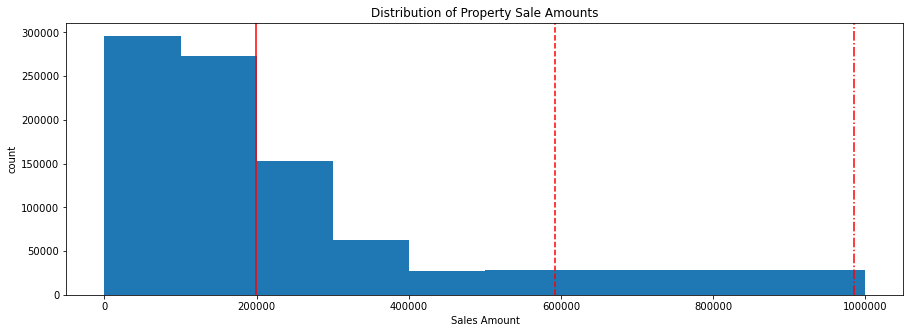

In [7]:
S_AMT_mean = df['S_AMT'].mean()
S_AMT_std = df['S_AMT'].std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=df, x='S_AMT', bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000])
_ = plt.xlabel('Sales Amount')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Property Sale Amounts')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(S_AMT_mean, color='r')
_ = plt.axvline(S_AMT_mean+S_AMT_std, color='r', linestyle='--')
_ = plt.axvline(S_AMT_mean+(2*S_AMT_std), color='r', linestyle='-.')

# 4 Types of Sales<a id='4'></a>
### TB Real Estate is only interested in analyzing recent, qualified sales of improved single family residential homes.

**Qualified Sales (QU)** are free market, single parcel, non-barter sales.  Unqualified sales that are multi-parcel, barter/trade, title transfer, etc. sales which would not represent market value.  Unqualified sales were already filtered out of the data during the data wrangling process.  Therefore, the QU, Reason Code (REA_CD), and Sale Type (S_TYPE) columns can be dropped.

In [8]:
print(df['QU'].describe())
df.drop(['QU', 'REA_CD', 'S_TYPE'], axis=1, inplace=True)

count     847102
unique         1
top            Q
freq      847102
Name: QU, dtype: object


**Improved** property sales indicate that the property includes a structure (house).  Vacant property sales would only include the land.  Since TB Real Estate Corp is only interested in improved properties, the vacant property sales will be dropped.

In [9]:
print(df['VI'].value_counts())
df = df[df['VI'] == 'I']
df.drop('VI', axis=1, inplace=True)

I    799492
V     47610
Name: VI, dtype: int64


**Single Family Residental** homes are represented by a **DOR Code** of 100. DOR Code is the Department of Revenue Code which indicates the type of property (i.e. single family home, condo, commercial, etc.)  The data has already been filtered for the following residential property types.
- 0100: Single Family Residential
- 0102: Single family home built around a mobile home
- 0106: Townhouse/Villa
- 0200: Mobile Home
- 0400: Condominium
- 0408: Mobile Home Condominium
- 0800: Multi-Family Residential (Duplex, Triplex, Quadplex, etc.) < 10 units
- 0801: Multi-Family Residential (units individually owned)
- 0802: Multi-Family Residential (units rentals)

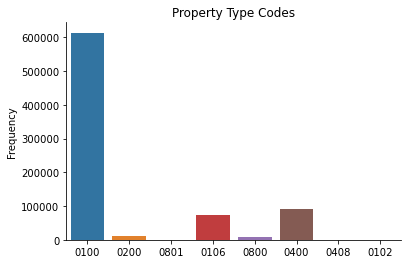

In [10]:
sns.countplot(data=df, x='DOR_CODE')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Property Type Codes')
sns.despine()
plt.show()

Most of the property sales are Single Family Residential (code 0100).  Condominiums (0400) and Townhouses (0106) are the next highest categories, but they are just a small fraction of the total sales.  
<br>
TB Real Estate Corp will focus on Single Family Residential homes as Condominiums and Townhouses have more investment complications such as association fees and rules restricting sales and rentals.

In [11]:
df = df[df['DOR_CODE'] == '0100']
df.drop('DOR_CODE', axis=1, inplace=True)

**Recent Property Sales** can be identified with the **Sales Date (S_DATE)**.  Property sales increased sharply from the mid-1990's to the mid-2000's when the U.S. mortgage crisis crashed the housing market.  Over the 2010's the annual number of property sales increased to near the levels prior to the crash.  

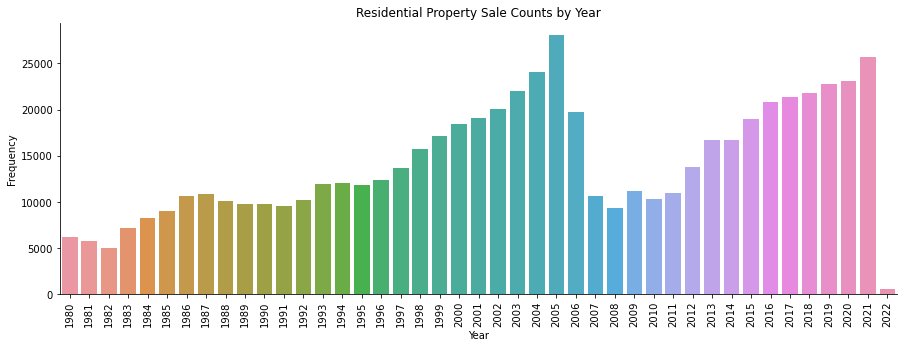

In [12]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['S_DATE'].dt.year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Year')
sns.despine()
plt.show()

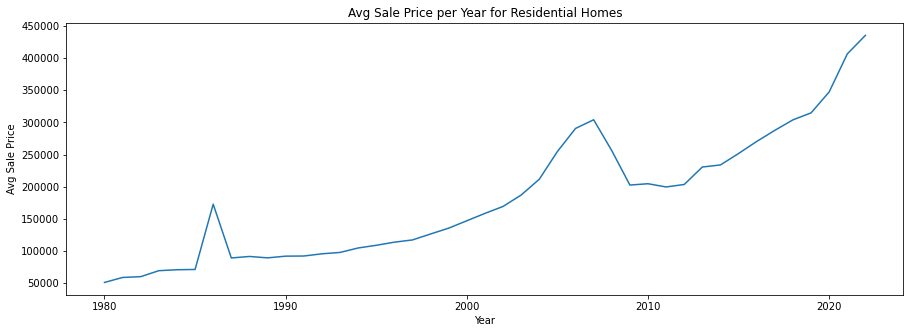

In [13]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.year)['S_AMT'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price per Year for Residential Homes')
plt.show()

Sales data prior to 2021 is excluded as market conditions such as the mid-2000's real-estate crisis can influence price.  In order to predict current market values, we will focus on the most current year of sales data.
<br>
Although the number of sales each month over 2021 were relatively consistent, the sales prices increased significantly.

In [14]:
df = df[df['S_DATE'] >= '2021-01-01']

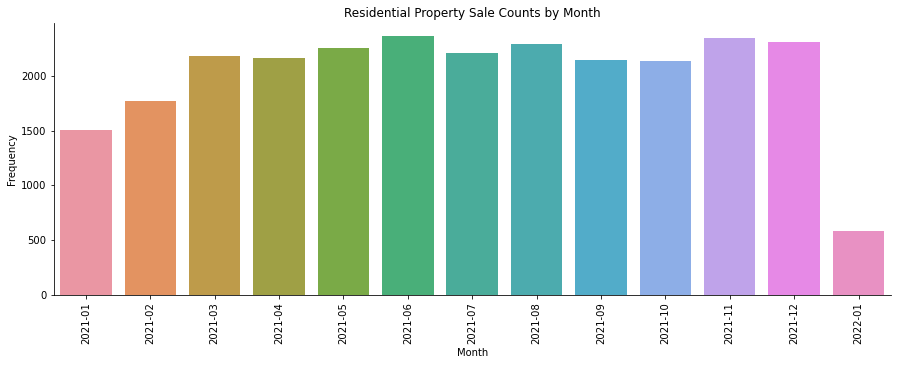

In [15]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['S_DATE'].dt.to_period('M').sort_values())
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Month')
sns.despine()
plt.show()

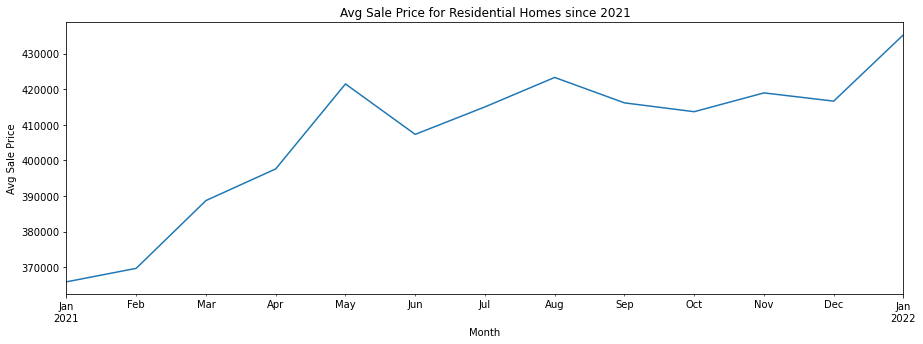

In [16]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.to_period('M'))['S_AMT'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price for Residential Homes since 2021')
plt.show()

# 5 Home Features<a id='5'></a>
### TB Real Estate is only interested in purchasing investment properties with features that are attractive to most potential home buyers. 

**# of Beds/Baths**: The number of bedrooms and bathrooms are important features for home sales.  Most single family residential homes have 3 or 4 bedrooms and 2 bathrooms. 
<br>
TB Real Estate Corp is focused on investing in residential homes with 3-5 bedrooms and 1-4 bathrooms.  Anything less or more would not be appealing to most home buyers. 

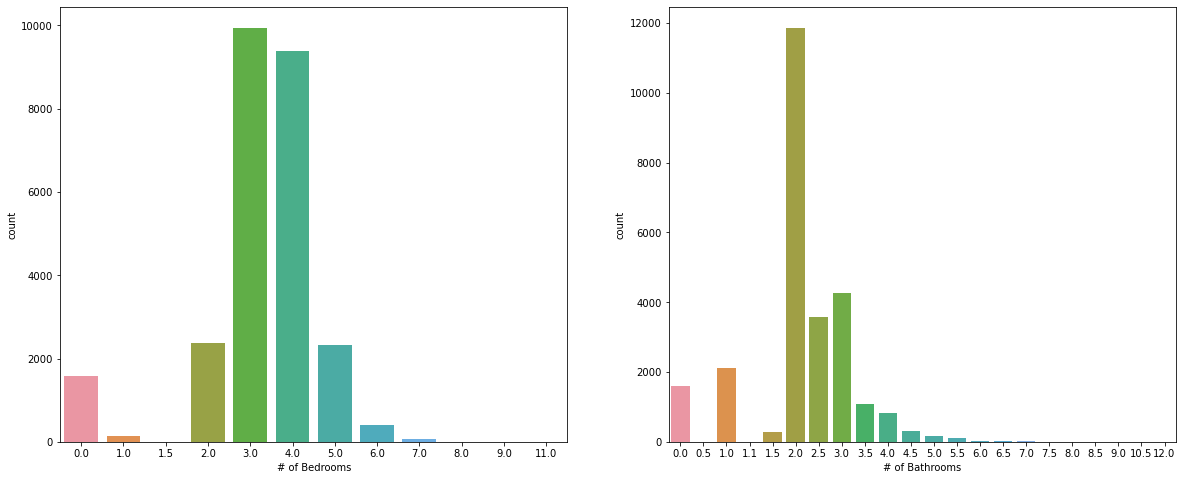

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df['tBEDS'], ax=ax1)
sns.countplot(df['tBATHS'],ax=ax2)
ax1.set(xlabel='# of Bedrooms', ylabel='count')
ax2.set(xlabel='# of Bathrooms', ylabel='count')
plt.show()

In [18]:
df = df[(df['tBEDS'] >= 3) & (df['tBEDS'] <= 5)]
df = df[(df['tBATHS'] >= 1) & (df['tBATHS'] <= 4)]

**# of Buildings/Stories/Units**: Most homes have just 1 building structure, 1 unit and 1 or 2 stories.  However, there are a few outliers that have more.  
<br>
TB Real Estate is only interested in properties that have a single building/unit and 1-2 stories.

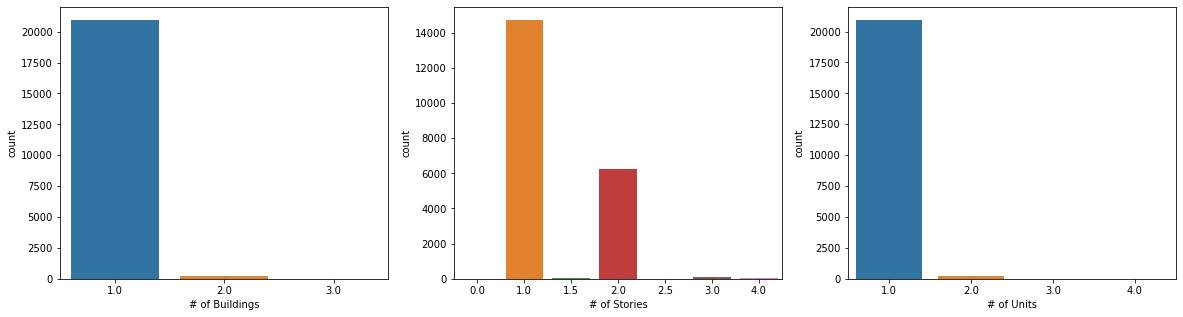

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
sns.countplot(df['tBLDGS'], ax=ax1)
sns.countplot(df['tSTORIES'],ax=ax2)
sns.countplot(df['tUNITS'],ax=ax3)
ax1.set(xlabel='# of Buildings', ylabel='count')
ax2.set(xlabel='# of Stories', ylabel='count')
ax3.set(xlabel='# of Units', ylabel='count')
plt.show()

In [20]:
df = df[df['tBLDGS'] == 1]
df = df[df['tUNITS'] == 1]
df = df[(df['tSTORIES'] >= 1) & (df['tSTORIES'] <= 2)]
df.drop(['tBLDGS', 'tUNITS', 'tSTORIES'], axis=1, inplace=True)

**Age of Home**: The age of the home may have an impact on the sales price.  Old homes could require more investment in maintenance and repairs than newer homes.  Calculate age of home (AGE) based on Actual Year Built (ACT).  Drop actual year built as well as the original sales date (ORIG_SALES_DATE) and effective year (EFF) which is used to calculate depreciation.  Drop base year (BASE) which is used to calculate property tax based on when the homestead tax exemption was approved.
<br>
The mean home age is 27 years old and the median value is 21.  

In [21]:
df['AGE'] = datetime.today().year - df['ACT']
df.drop(['ACT', 'ORIG_SALES_DATE', 'EFF', 'BASE'], axis=1, inplace=True)

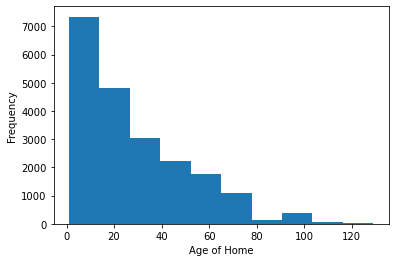

count    20881.000000
mean        26.976821
std         24.092737
min          1.000000
25%          5.000000
50%         21.000000
75%         42.000000
max        129.000000
Name: AGE, dtype: float64

In [22]:
plt.hist(df['AGE'])
plt.xlabel('Age of Home')
plt.ylabel('Frequency')
plt.show()
df['AGE'].describe()

**Heated Area**: The heated area is the square footage of the home that is heated.  This is equivalent to the size of the home and is an important factor in home sales.  Most single family residential homes are between 1500 and 2500 square feet.

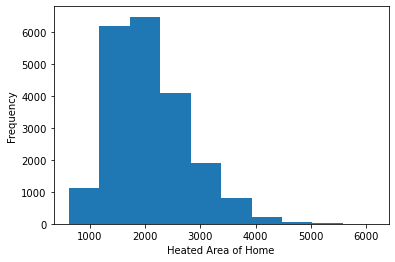

count    20881.000000
mean      2078.774484
std        695.228393
min        624.000000
25%       1549.000000
50%       1944.000000
75%       2500.000000
max       6124.000000
Name: HEAT_AR, dtype: float64

In [23]:
plt.hist(df['HEAT_AR'])
plt.xlabel('Heated Area of Home')
plt.ylabel('Frequency')
plt.show()
df['HEAT_AR'].describe()

**Acreage**: The acreage is the size of the land and is an important factor in home sales.  Most properties are between 0.14 and 0.24 acres.

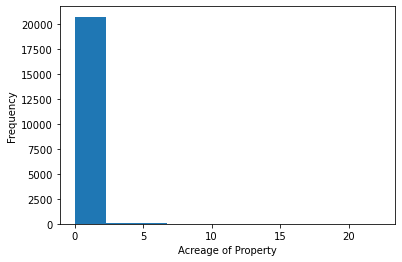

count    20881.000000
mean         0.272495
std          0.532320
min          0.042651
25%          0.137741
50%          0.173268
75%          0.239828
max         22.257300
Name: ACREAGE, dtype: float64

In [24]:
plt.hist(df['ACREAGE'])
plt.xlabel('Acreage of Property')
plt.ylabel('Frequency')
plt.show()
df['ACREAGE'].describe()

# 6 Property Location<a id='6'></a>
## Location, Location, Location!! 
Location is a very important factor when evaluating market value of homes.  There are multiple ways of describing the property location based on the data.

**Postal Address** includes the street address (SITE_ADDR), city name (SITE_CITY), and zip code (SITE_ZIP).

**Property Indentification Number (PIN)** is defined by the County Property Appraiser to uniquely identify each property based on the grid below.  It is made up of the following data:
- MUNICIPALITY_CD - "A"=Tampa, "T"=Temple Terrace, "P"=Plant City, "U"=Unincorporated
- TOWNSHIP_CD - Values 27-32 indicating the latitudinal rows on the grid map below.
- RANGE_CD - Values 17-22 indicating the longitudinal columns on the grid map below.
- SECTION_CD - Values 1-36 represented by the 6x6 sections of red squares within each Township/Range on the grid map below.
- LAND_TYPE_ID - Identifies the type of land. All platted Subdivisions have been assigned an ID number. For all unplatted, "ZZZ" has been assigned. 
- BLOCK_NUM - 6 digit code for the Block Number in platted Subdivisions. For unplatted land, the BLOCK# will carry a uniquely assigned number.
- LOT_NUM - 6 digit code for the Lot Numbers in Platted Subdivisions. For all unplatted land, the LOT# will carry a uniquely assigned number. 

**Market Area** is also defined by the County Property Appraiser for assessing values for tax purposes.  Each Market Area contains multiple Neighborhoods.  Each of the 29 Market Areas are represented by the bold, black division lines and large purple numbers in the grid map below.  The Neighborhoods are represented by the colored areas and have a unique 6 digit identifier.

In [25]:
# Market Area Code can be extracted from the second and third digits of the Neighborhood Code
df['MARKET_AREA_CD'] = df['NBHC'].astype(str).str[1:3]

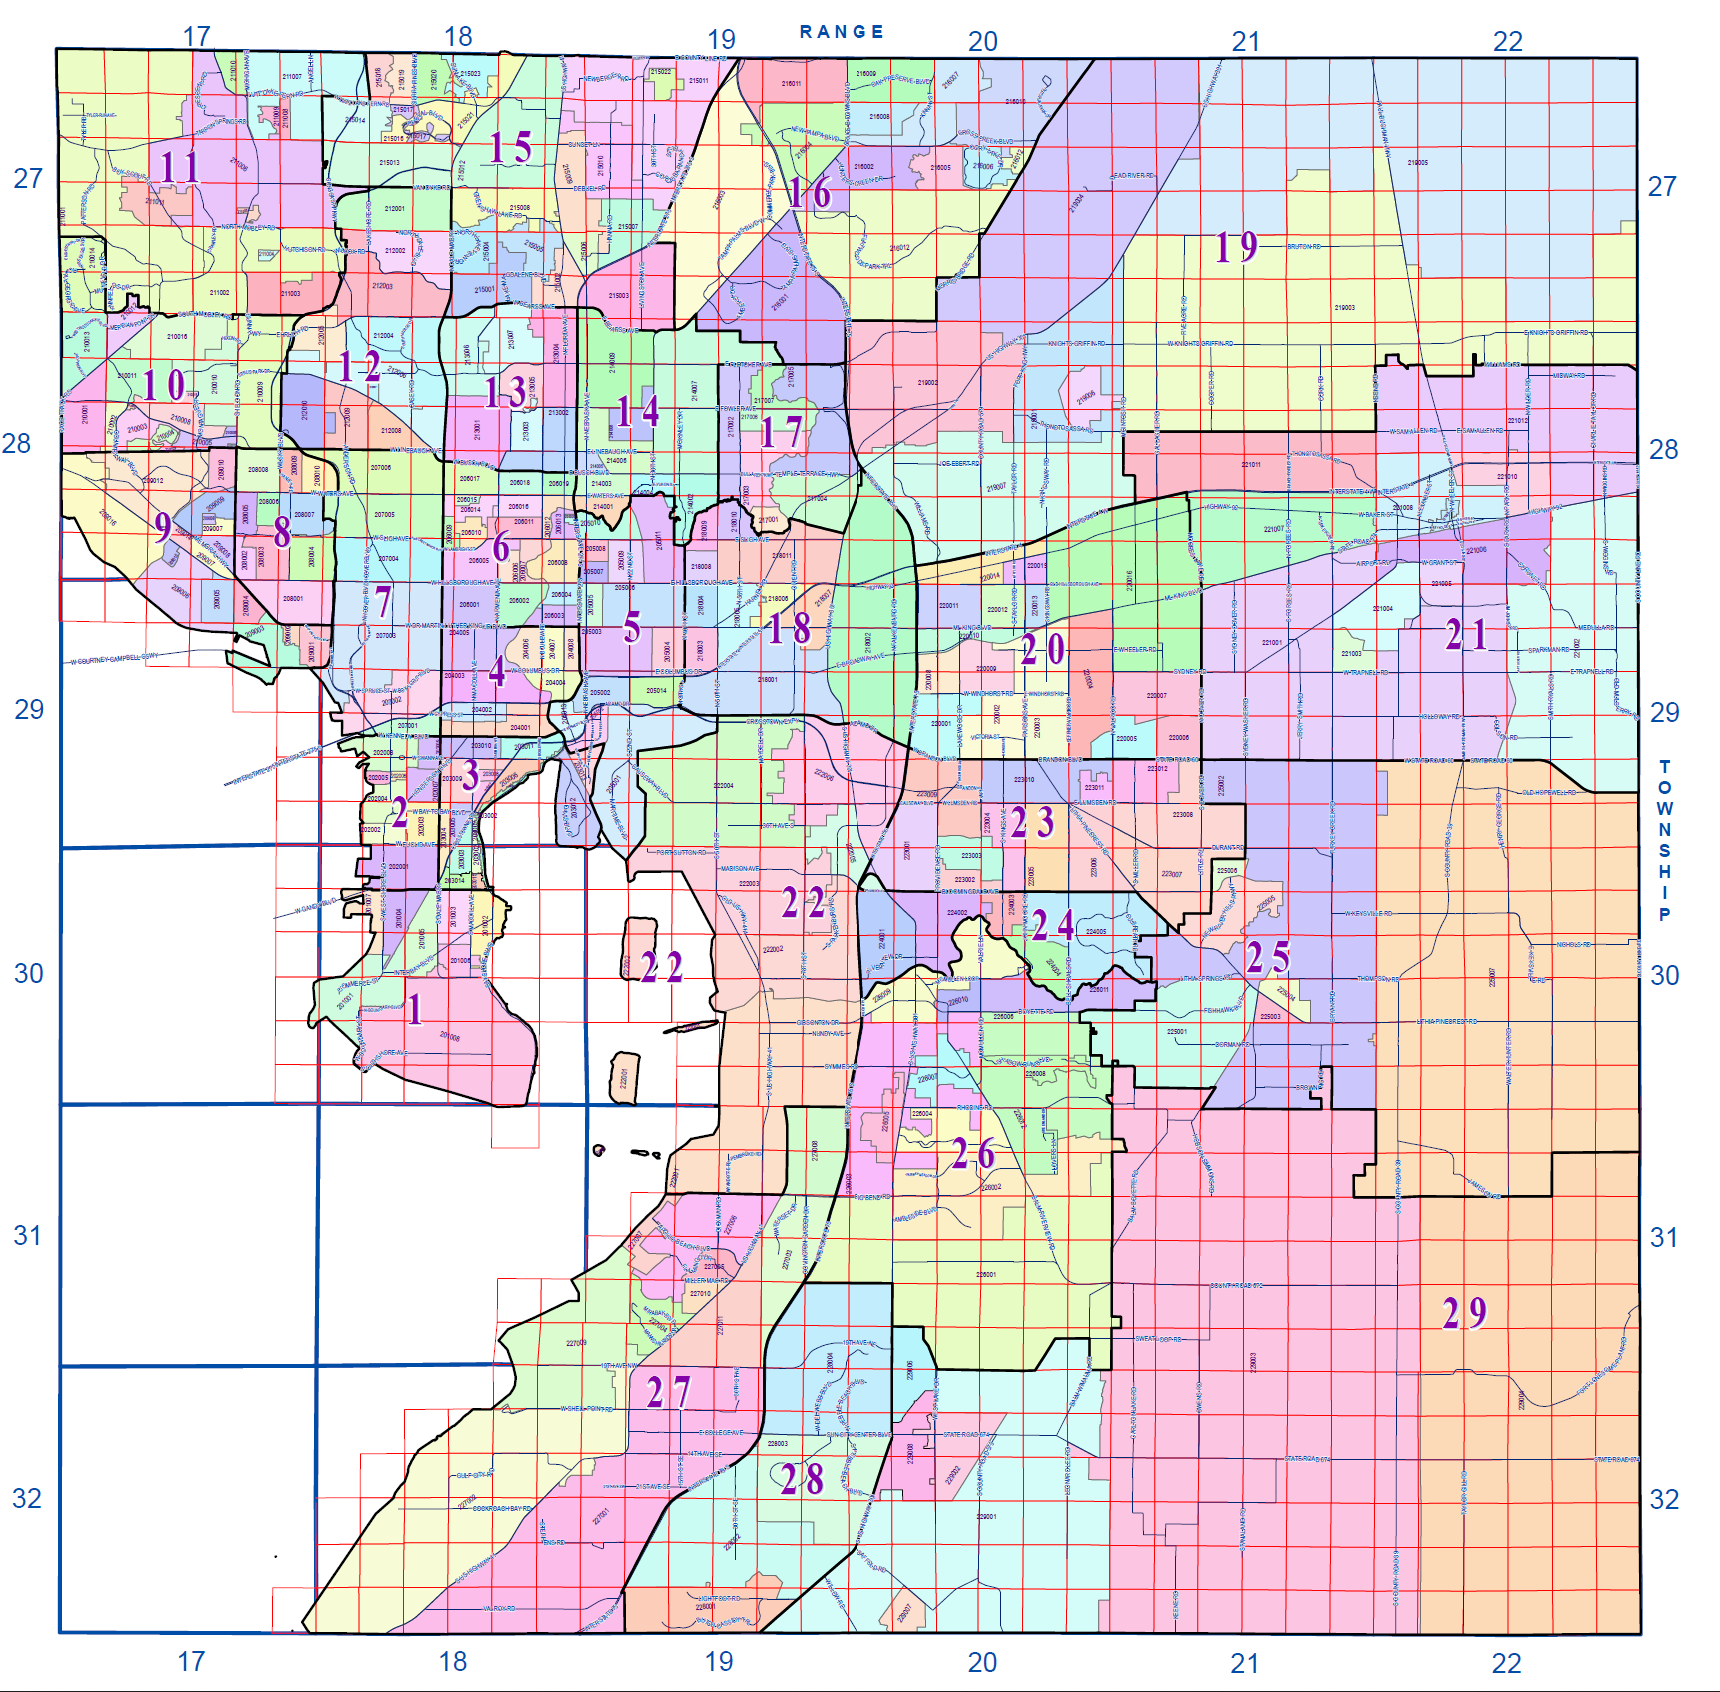

**Market Area Code** can be extracted from the second and third digits of the Neighborhood Code.  Over the past year, Market Areas 26 and 27 have had the most sales.

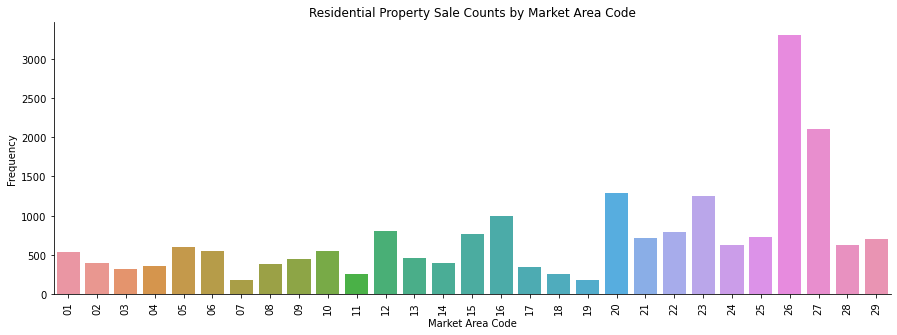

In [26]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['MARKET_AREA_CD'].sort_values())
plt.xlabel('Market Area Code')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Market Area Code')
sns.despine()
plt.show()

**Neighborhood Code** is used to describe 307 areas of Hillsborough County and is used by the County Property Appraiser to assess values for tax purposes. Of the top-10 Neighborhoods for number of sales, 7 of them are in Market Areas 26 and 27.  The other 3 are in Market Areas 25, 28, and 29.  This indicates that the southern portion of the county is the most active market for home sales.

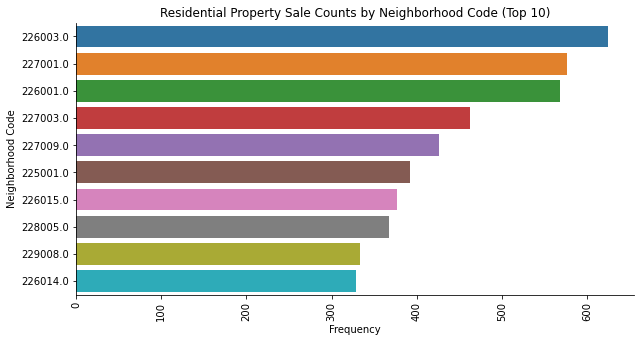

count        20881
unique         307
top       226003.0
freq           624
Name: NBHC, dtype: object


In [27]:
plt.subplots(figsize=(10, 5))
sns.countplot(y="NBHC", data=df, order=df.NBHC.value_counts().iloc[:10].index)
plt.ylabel('Neighborhood Code')
plt.xlabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Neighborhood Code (Top 10)')
sns.despine()
plt.show()
print(df['NBHC'].astype(str).describe())

# 7 Taxable Values of Properties<a id='7'></a>
The County Property Appraiser determines property values for tax purposes.  These values are reassessed each year and is based on the following factors:
1. The present cash value.
2. The highest and best use of the property.
3. The location of the property.
4. The quantity or size of said property.
5. The cost of said property.
6. The condition of said property.
7. The income of said property.
8. The net proceeds of the sale of said property.
Under Florida law, a residence must be reassessed at market value when it sells.
https://www.hcpafl.org/Property-Info/Truth-In-Millage

**Just Value** is the just/market value of the home as determined by the County Property Appraiser.  

In [28]:
print(df['JUST'].describe().apply(lambda x: format(x, 'f')))

count      20881.000000
mean      315850.429098
std       145097.276616
min        41602.000000
25%       228221.000000
50%       280513.000000
75%       358895.000000
max      3479779.000000
Name: JUST, dtype: object


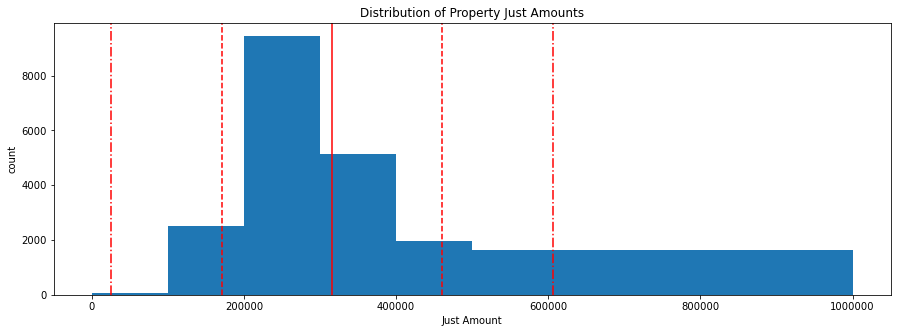

In [29]:
JUST_mean = df['JUST'].mean()
JUST_std = df['JUST'].std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=df, x='JUST', bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000])
_ = plt.xlabel('Just Amount')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Property Just Amounts')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(JUST_mean, color='r')
_ = plt.axvline(JUST_mean+JUST_std, color='r', linestyle='--')
_ = plt.axvline(JUST_mean+(2*JUST_std), color='r', linestyle='-.')
_ = plt.axvline(JUST_mean-JUST_std, color='r', linestyle='--')
_ = plt.axvline(JUST_mean-(2*JUST_std), color='r', linestyle='-.')

**Other Tax-Related Values** include the following:
- LAND - market value of the land for tax purposes
- BLDG - market value of all of the buildings on the property for tax purposes
- EXF - market value of all of the extra features on the property for tax purposes (i.e. fences, dock, pool, utility shed)
- ASD_VAL - assessed value (value of land & improvements, less any Save Our Homes 3% cap or non-homestead 10% cap)
- TAX_VAL - taxable value (ASD_VAL less any exemptions, such as homestead, widow, disability)

In [30]:
# The JUST value is always equal to the sum of the values for LAND, BLDG, and EXF
assert df[df['JUST'] != (df['LAND'] + df['BLDG'] + df['EXF'])].shape[0] == 0

In [31]:
# ASD_VAL and TAX_VAL are the JUST value limited by annual increase caps and minus any tax exemptions. 
# These values along with the LAND, BLDG, and EXF can be dropped since they are by-products of the JUST value.
df.drop(['LAND', 'BLDG', 'EXF', 'ASD_VAL', 'TAX_VAL'], axis=1, inplace=True)

# 8 Correlations<a id='8'></a>

#### Initial Analysis will review the correlation of home features to the target feature of Sales Price across the entire county.

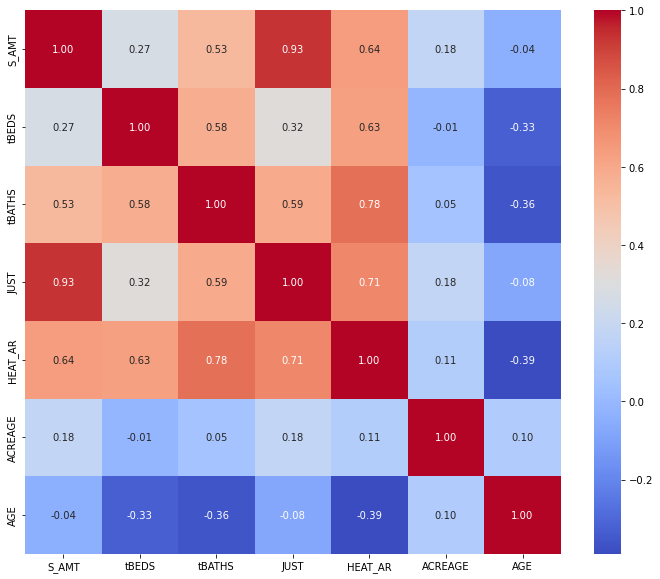

In [32]:
corr = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(round(corr, 2), annot=True, fmt='.2f', cmap="coolwarm");

In [33]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(dframe, y_val, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = y_val, data=dframe, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale price')
        ax.ticklabel_format(useOffset=False, style='plain')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

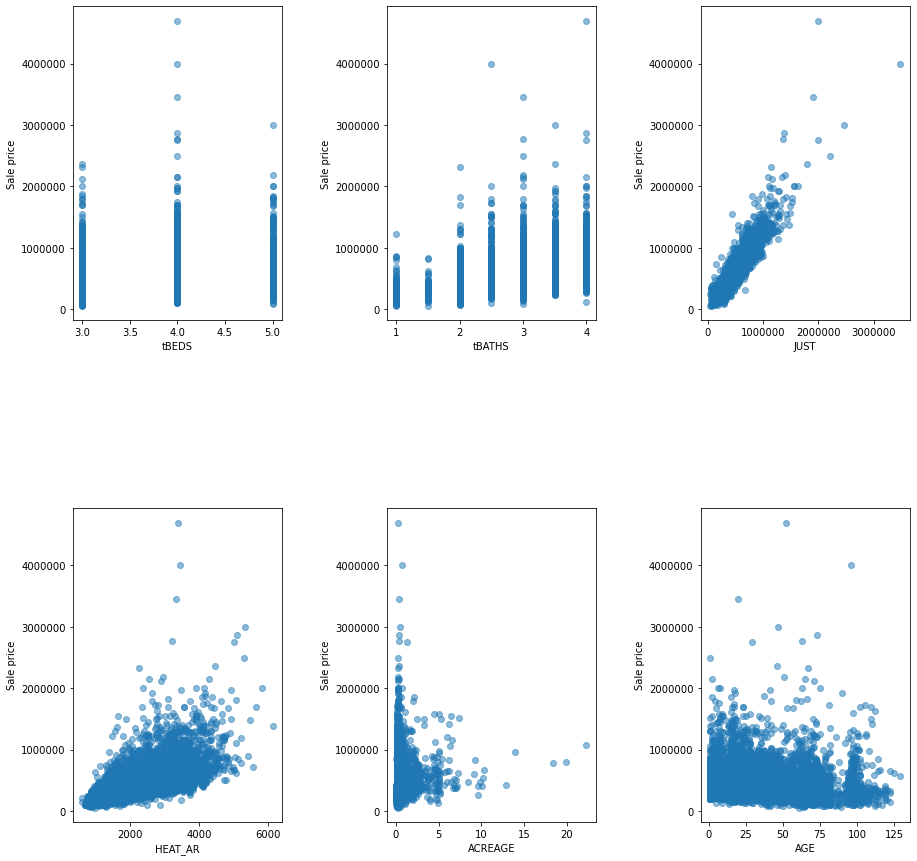

In [34]:
features = [c for c in df.columns if c in ['tBEDS', 'tBATHS', 'HEAT_AR', 'ACREAGE', 'AGE', 'JUST']]
scatterplots(df, "S_AMT", features, ncol=3, figsize=(15, 15))

In [35]:
# Pearson R Correlations
print(round(df.corr()[:1], 2))

       S_AMT  tBEDS  tBATHS  JUST  HEAT_AR  ACREAGE   AGE
S_AMT    1.0   0.27    0.53  0.93     0.64     0.18 -0.04


#### The following features are sorted in order from the strongest to weakest correlation with the target feature of Sales Price (S_AMT):
1. **JUST** - The Just/Market Value of the property has the strongest positive correlation with the Sales Price.  This could be expected since the JUST value is reassessed each year based on several factors including property sales.
2. **HEAT_AR** - The Heated Area of the home has a strong positive correlation with the Sales Price.  This could be expected since generally larger homes have a higher market value for a location.
3. **tBATHS** - The number of bathrooms has a relatively strong positive correlation with the Sales Price.  This could be expected since the number of bedrooms and bathrooms are generally important factors in home purchases.
4. **tBEDS** - The number of bedrooms has a positive correlation with the Sales Price.  It may seem surpising that the correlation is not as strong as the number of bathrooms.  However, the data was filtered for home sales with 3-5 bedrooms.  It seems that there is not a very significant difference in sale price between 3, 4, and 5 bedroom homes when considering all sales in the county.
5. **ACREAGE** - The number of acres of land has a slight positive correlation with the Sales Price when considering all sales in the county.
6. **AGE** - The age of the home has a slight negative correlation with the Sales Price when considering all sales in the county.  This is likely due to the varying conditions of older homes.

#### The above features do not take into account one of the most important features in home sales....
#### LOCATION, LOCATION, LOCATION!!!
The **Market Area** may provide valuable information into the sales prices of homes in different areas of the county.

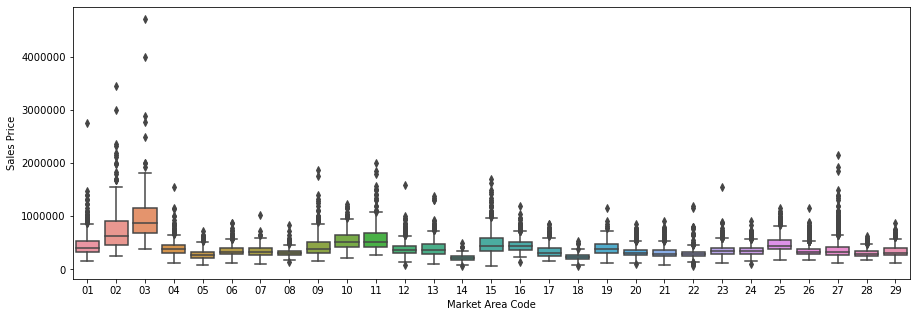

In [36]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df.sort_values(by="MARKET_AREA_CD"),
            x='MARKET_AREA_CD',
            y='S_AMT')
plt.xlabel('Market Area Code')
plt.ylabel('Sales Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

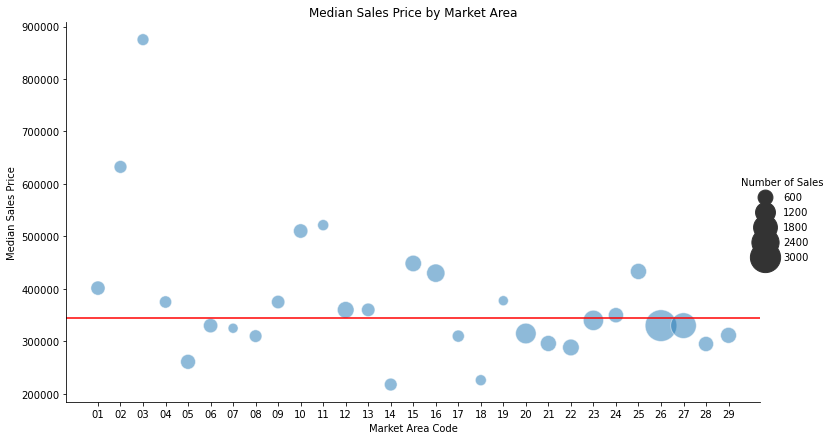

In [37]:
g = sns.relplot(x=df["MARKET_AREA_CD"].sort_values().unique(), y=df.groupby("MARKET_AREA_CD")["S_AMT"].median(), 
            size=df.groupby("MARKET_AREA_CD")["S_AMT"].count(),
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, aspect=1.8)
#            hue="MARKET_AREA_CD",
#            data=df, 
g._legend.set_title('Number of Sales')
plt.xlabel('Market Area Code')
plt.ylabel('Median Sales Price')
plt.title('Median Sales Price by Market Area')
plt.axhline(df['S_AMT'].median(), color='r')
plt.show()

Market Areas "02" and "03" represent South Tampa West and East respectively and have the highest average sales prices.  This makes sense as these homes are in the heart of the city of Tampa and have water on both sides.
<br><br>
Market Areas "26" and "27" had the most property sales over the past year and the median sales prices that are slightly below the median for the county.  

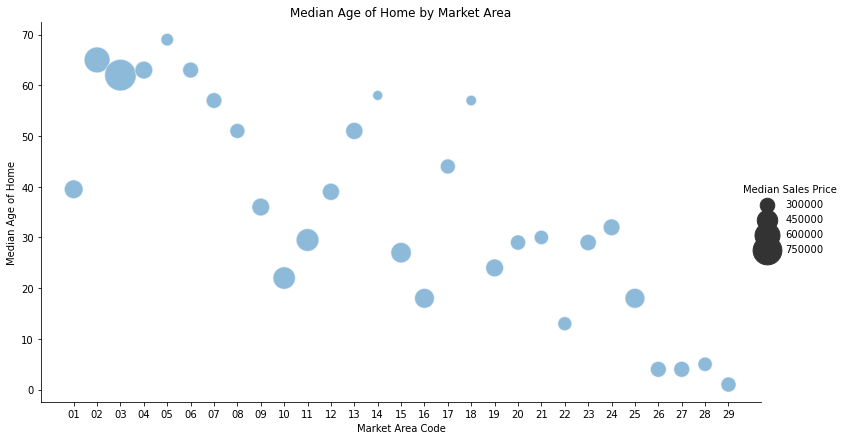

In [38]:
g = sns.relplot(x=df["MARKET_AREA_CD"].sort_values().unique(), y=df.groupby("MARKET_AREA_CD")["AGE"].median(), 
            size=df.groupby("MARKET_AREA_CD")["S_AMT"].median(),
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, aspect=1.8)
#            hue="MARKET_AREA_CD",
#            data=df, 
g._legend.set_title('Median Sales Price')
plt.xlabel('Market Area Code')
plt.ylabel('Median Age of Home')
plt.title('Median Age of Home by Market Area')
plt.show()

#### Market Areas 26 - 29
These Market Areas represent the southern portion of Hillsborough County.
- 26: Riverview / 301-S of Alafia River
- 27: Southbay
- 28: Sun City Sundance
- 29: Southeast

These Southern Market Areas are attractive for investments due to the following features:
1. Most home sales over the past year
2. Lowest median age of homes sold
3. Median sales prices below the county median sales price
These Market Areas appear to be good investment opportunities.

In [39]:
df_south = df[df['MARKET_AREA_CD']>='26']

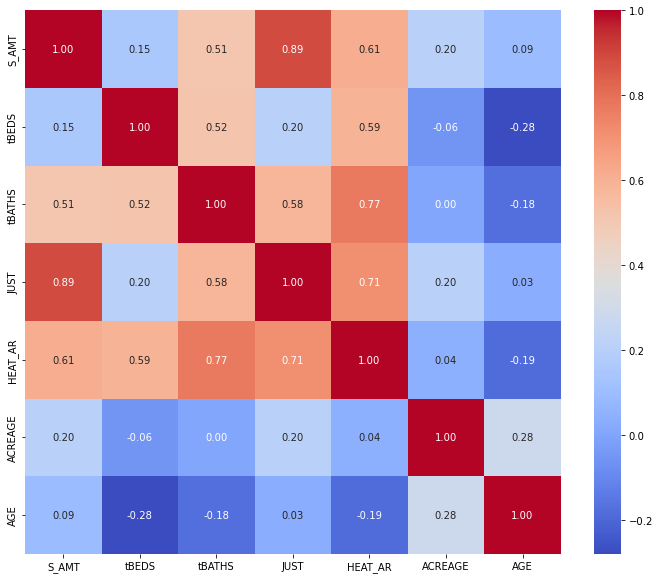

In [40]:
corr = df_south.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(round(corr, 2), annot=True, fmt='.2f', cmap="coolwarm");

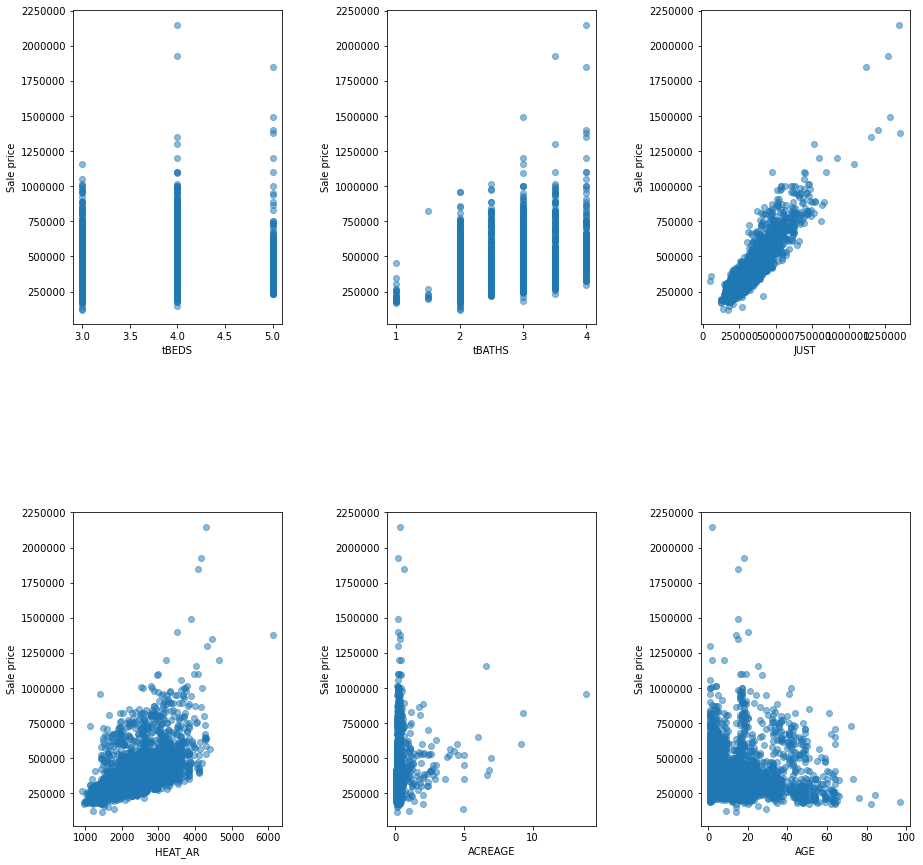

In [41]:
scatterplots(df_south, "S_AMT", features, ncol=3, figsize=(15, 15))

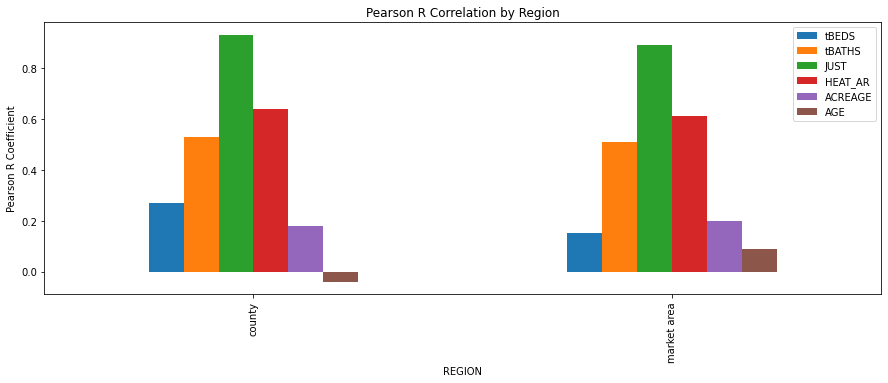

In [42]:
R_county = pd.DataFrame(round(df.corr()[:1], 2))
R_county['REGION'] = 'county'
R_market_area = pd.DataFrame(round(df_south.corr()[:1], 2))
R_market_area['REGION'] = 'market area'
R_compare = pd.concat([R_county, R_market_area])
R_compare.drop('S_AMT', axis=1, inplace=True)
R_compare.set_index('REGION', inplace=True)
R_compare.plot(kind='bar', figsize=(15,5))
plt.ylabel('Pearson R Coefficient')
plt.title('Pearson R Correlation by Region')
plt.show()

#### The Pearson R Correlation values for the Southern Market Areas are not quite as strong as the values for All Market Areas in the entire county.  
It is interesting that the Age of the home went from a slightly negative correlation to a slightly positive correlation.  Also, the correlation of the number of Bedrooms were lower by 0.12.  However, these differences may not be significant. 

#### We will look further into the Neighborhoods for the southern market areas.

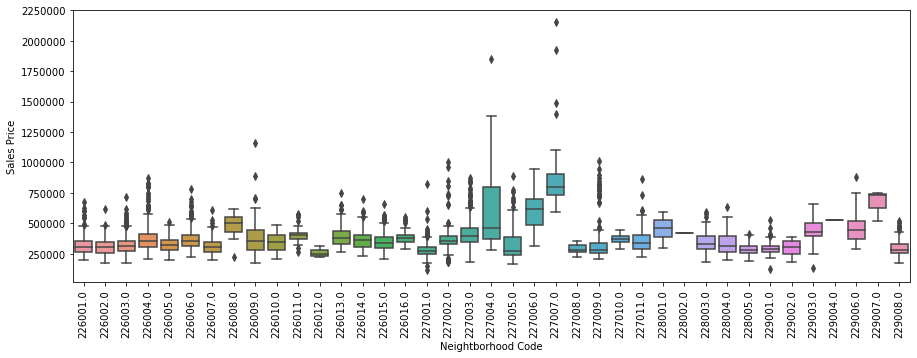

In [43]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df_south.sort_values(by="NBHC"),
            x='NBHC',
            y='S_AMT')
plt.xlabel('Neightborhood Code')
plt.ylabel('Sales Price')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
plt.show()

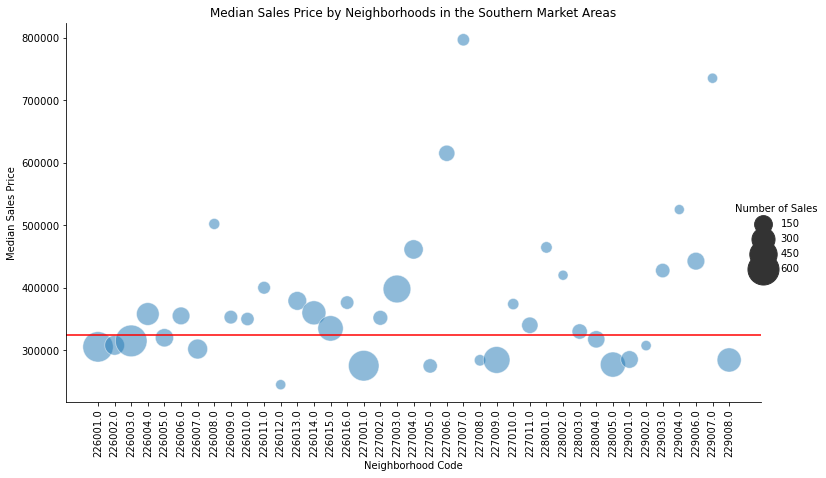

In [44]:
g = sns.relplot(x=df_south["NBHC"].sort_values().unique(), y=df_south.groupby("NBHC")["S_AMT"].median(), 
            size=df_south.groupby("NBHC")["S_AMT"].count(),
            sizes=(100, 1000), alpha=.5, palette="muted",
#            hue=df_south['MARKET_AREA_CD'],
            height=6, aspect=1.8)
g._legend.set_title('Number of Sales')
plt.xlabel('Neighborhood Code')
plt.ylabel('Median Sales Price')
plt.title('Median Sales Price by Neighborhoods in the Southern Market Areas')
plt.xticks(rotation = 90)
plt.axhline(df_south['S_AMT'].median(), color='r')
plt.show()

Neighborhoods "227007.0" and "229007.0" represent Andalucia/Symphony Isles Area and Riverranch Preserve Area respectively and have the highest average sales prices.  Symphony Isles is a small neighborhood that is on the bay.  Riverranch is a small neighborhood in the preserve area.
<br><br>
Neighborhood "227001.0" represents the Ruskin Area W of I75 E of Hwy 41.  It had one of the largest number of property sales over the past year and the median sales price is significantly below the median for the Southern Market Areas.  

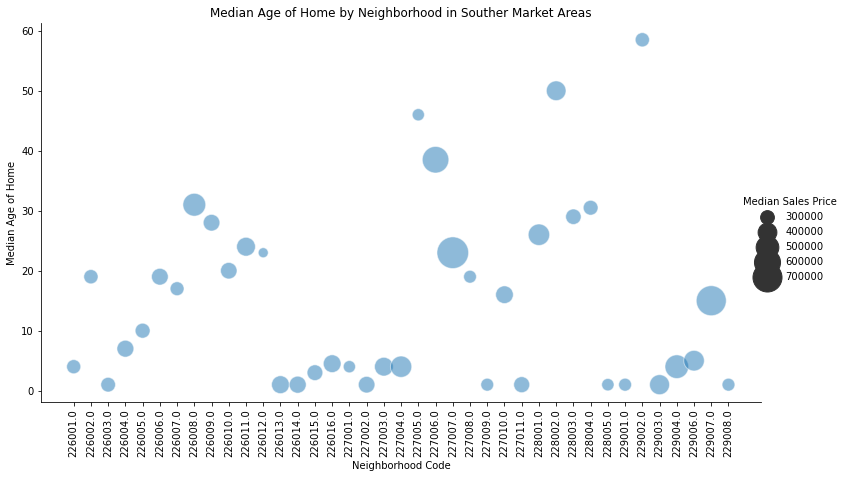

In [45]:
g = sns.relplot(x=df_south["NBHC"].sort_values().unique(), y=df_south.groupby("NBHC")["AGE"].median(), 
            size=df_south.groupby("NBHC")["S_AMT"].median(),
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, aspect=1.8)
g._legend.set_title('Median Sales Price')
plt.xlabel('Neighborhood Code')
plt.ylabel('Median Age of Home')
plt.title('Median Age of Home by Neighborhood in Souther Market Areas')
plt.xticks(rotation = 90)
plt.show()

#### Neighborhood "227001.0" represents the Ruskin Area W of I75 E of Hwy 41
This neighborhood is attractive for investments due to the following features:
1. One of the largest number of home sales over the past year
2. Low median age of homes sold
3. One of the lowest median sales price in the Southern Market Area.
This Neighborhood appears to have good investment opportunities.

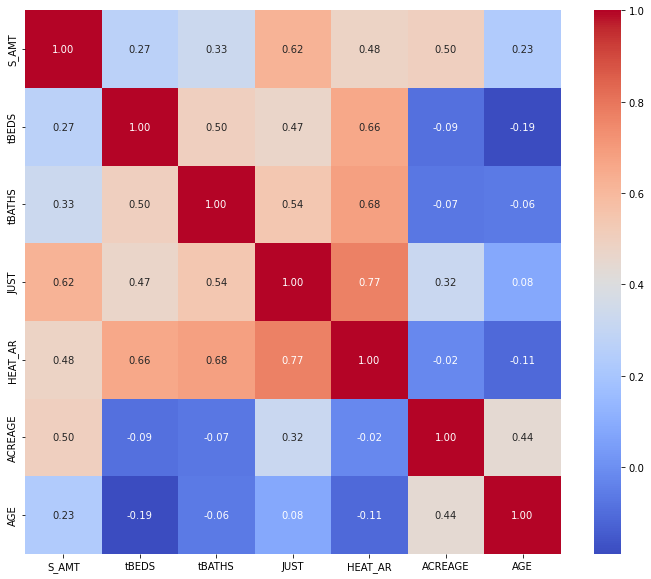

In [46]:
corr = df_south[df_south['NBHC']=='227001.0'].corr()
plt.subplots(figsize=(12,10))
sns.heatmap(round(corr, 2), annot=True, fmt='.2f', cmap="coolwarm");

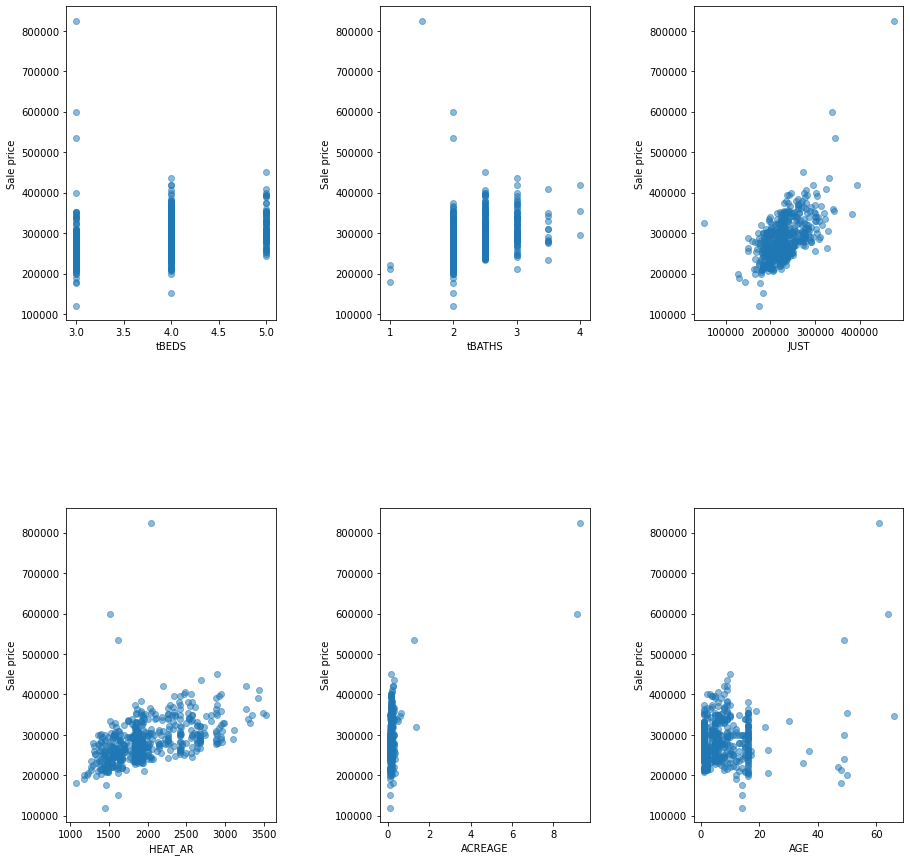

In [47]:
scatterplots(df_south[df_south['NBHC']=='227001.0'], "S_AMT", features, ncol=3, figsize=(15, 15))

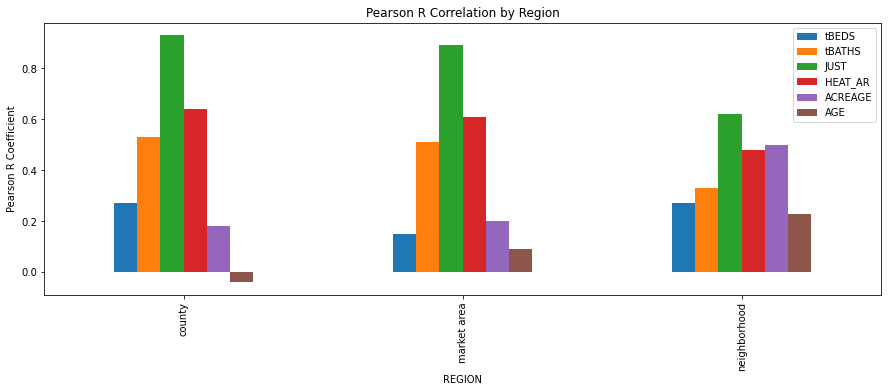

In [48]:
R_county = pd.DataFrame(round(df.corr()[:1], 2))
R_county['REGION'] = 'county'
R_market_area = pd.DataFrame(round(df_south.corr()[:1], 2))
R_market_area['REGION'] = 'market area'
R_neighborhood = pd.DataFrame(round(df_south[df_south['NBHC']=='227001.0'].corr()[:1], 2))
R_neighborhood['REGION'] = 'neighborhood'
R_compare = pd.concat([R_county, R_market_area, R_neighborhood])
R_compare.drop('S_AMT', axis=1, inplace=True)
R_compare.set_index('REGION', inplace=True)
R_compare.plot(kind='bar', figsize=(15,5))
plt.ylabel('Pearson R Coefficient')
plt.title('Pearson R Correlation by Region')
plt.show()

#### The Pearson R Correlation values for the Ruskin Area W of I75 E of Hwy 41 Neighborhood are not quite as strong as the values for All Market Areas in the entire county.  
It is interesting that the Age of the home went from a slightly negative correlation to a higher positive correlation than the Southern Market Areas.  Also, the acres of land correlation to sales price increased significantly.  However, these differences may not be significant. 

### Age / Condition of Home
Initial modeling confirmed that the sales price prediction accuracy is significantly impacted by the age of the home.  Homes over 20 years old can vary greatly in their condition/deterioration making it difficult to predict the sales prices without data related to the condition of the home as shown in the chart below.  

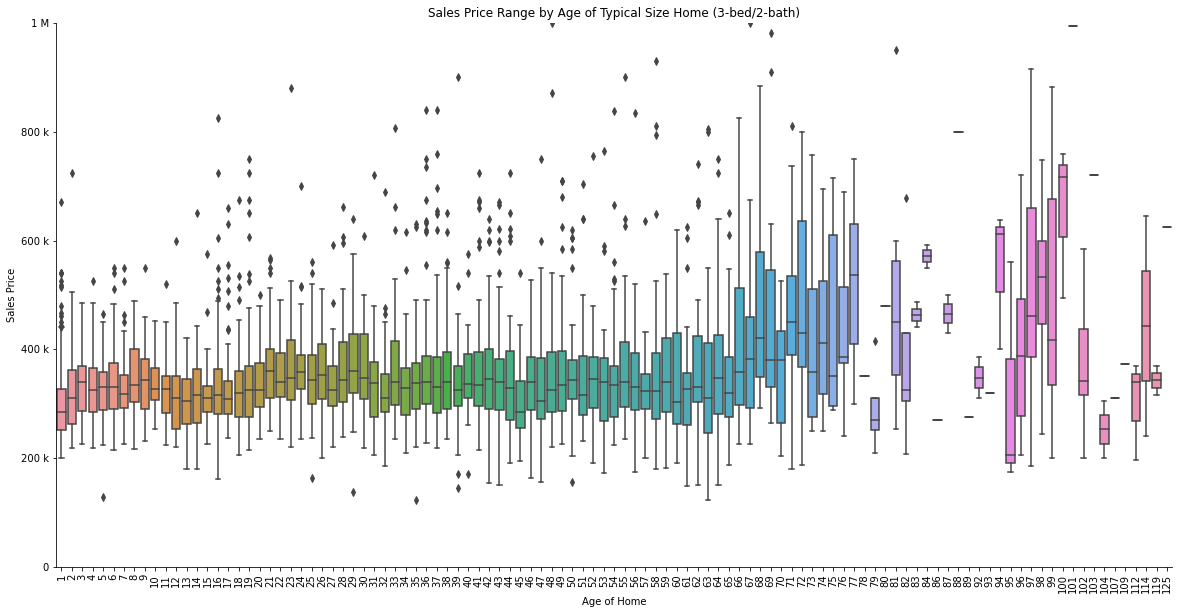

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.boxplot(x="AGE", y="S_AMT",
           # hue="Fuel", palette="viridis",
           # hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df[(df.tBEDS==3) & (df.tBATHS==2) & df.HEAT_AR.between(1500, 2500)],
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
ax.set_ylim([-1, 1000000])
# g.legend_.set_title(None)
g.set_title('Sales Price Range by Age of Typical Size Home (3-bed/2-bath)')
g.set_xlabel('Age of Home')
g.set_ylabel('Sales Price')
sns.despine()
# plt.tick_params(labelsize=20)
# plt.legend(fontsize=20)
plt.show()

Based on this analysis, TB Real Estate Corporation will target homes that are less than 20 years old in order to mitigate the risk of purchasing a home that is requires significant improvements.

In [50]:
df = df[df.AGE < 20]

# 9 Summary<a id='9'></a>

The Just Value appears to be the best predictor of sales price/market value.  This would be expected as the Hillsborough County Property Appraisor reassesses the Just/Market value each year based on several factors including property sales.  
<br>
The home features that best correlate to sales price are the Heated Area followed by the number of bathrooms and the number of bedrooms.  The number of acres of land is not a strong correlation as most properties have a similar property size.  Also, the age of the home does not provide a strong correlation to the sales price.
<br><br>
The following Market Areas in the southern portion of the county appear to be the fastest growing areas.  <br>
26: Riverview / 301-S of Alafia River<br>
27: Southbay<br>
28: Sun City Sundance<br>
29: Southeast<br>
<br>
The southern portion of the county had the most home sales over the past year, the lowest median age of homes sold, and a median sales prices below the county median sales price. These Market Areas appear to be good investment opportunities.<br><br>
Neighborhood "227001.0" represents the Ruskin Area W of I75 E of Hwy 41.  This neighborhood is attractive for investments as it had one of the largest number of home sales over the past year, a relatively low median age of homes sold, and one of the lowest median sales price in the Southern Market Area. 

In [51]:
# Save data to interim data folder as csv file
df.to_csv(interim_data + 'sales_df_EDA.csv', index=False)